# WS: CNN Model Kernels
สร้าง CNN Model และแอบส่องดู Kernel

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
in_shape = (100, 100, 3)        # input image shape

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

## CNN Model

## Create Model

In [3]:
# assign name to each layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten 
import matplotlib.pyplot as plt
import numpy as np

in_shape = (100, 100, 3)        # input image shape

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape, name="conv2D_1")) 
model.add(MaxPool2D((2, 2), name="MaxPool_1"))

model.add(Conv2D(64, (3,3), activation='relu', name="conv2D_2")) 
model.add(MaxPool2D((2, 2), name="MaxPool_2"))

model.add(Conv2D(128, (3,3), activation='relu', name="conv2D_3")) 
model.add(MaxPool2D((2, 2), name="MaxPool_3"))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2D_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 MaxPool_1 (MaxPooling2D)    (None, 49, 49, 32)        0         
                                                                 
 conv2D_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 MaxPool_2 (MaxPooling2D)    (None, 23, 23, 64)        0         
                                                                 
 conv2D_3 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 MaxPool_3 (MaxPooling2D)    (None, 10, 10, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 12800)            

In [4]:
# !pip show pydot
!pip show pydotplus

Name: pydotplus
Version: 2.0.2
Summary: Python interface to Graphviz's Dot language
Home-page: http://pydotplus.readthedocs.org/
Author: PyDotPlus Developers
Author-email: carlos@jenkins.co.cr
License: UNKNOWN
Location: c:\users\asus\anaconda3\lib\site-packages
Requires: pyparsing
Required-by: 


In [5]:
# pydot or pydotplus and Graphviz (https://graphviz.org/)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=120)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Kernel

In [6]:
for layer in model.layers:
    print(layer.name)

conv2D_1
MaxPool_1
conv2D_2
MaxPool_2
conv2D_3
MaxPool_3
flatten_1
dense_1


In [7]:
# filter กรองเอาเฉพาะที่เป็น conv2d
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    kernels, biases = layer.get_weights()
    print(layer.name, ' shape:', kernels.shape)

conv2D_1  shape: (3, 3, 3, 32)
conv2D_2  shape: (3, 3, 32, 64)
conv2D_3  shape: (3, 3, 64, 128)


In [8]:
model_layer_idx = 2         # 0 2 4
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 32, 64)

In [9]:
kernels

array([[[[-0.0166285 , -0.08124416, -0.00685342, ...,  0.01867523,
           0.05915501, -0.04752179],
         [ 0.05253518, -0.07071372,  0.03892577, ...,  0.06334681,
          -0.00327108,  0.02742948],
         [-0.046863  , -0.01896044,  0.03151468, ...,  0.02398691,
           0.04926664,  0.05844808],
         ...,
         [ 0.00863459,  0.06432321, -0.05525432, ...,  0.02529212,
           0.06245799, -0.0349983 ],
         [-0.06169949, -0.00115669, -0.02853753, ...,  0.03156167,
          -0.0770539 ,  0.02483692],
         [-0.05947481, -0.06196519,  0.07120661, ...,  0.025747  ,
           0.05865438,  0.04751762]],

        [[ 0.05744155,  0.01418201,  0.01837027, ..., -0.0628775 ,
           0.00385056,  0.07134274],
         [ 0.05710716, -0.05342017, -0.04104342, ...,  0.00365862,
          -0.00531868,  0.0777599 ],
         [ 0.03024983,  0.01352513,  0.06406441, ...,  0.07073385,
           0.07470245, -0.04004643],
         ...,
         [ 0.01462984, -0.06070711

In [10]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
kernel_idx = 0             ##  0 1 2 3 ...
kernel_i = kernels[:, :, 0 , kernel_idx]
print(kernel_i.round(2))

[[-0.02  0.06 -0.08]
 [ 0.05 -0.06 -0.  ]
 [ 0.04 -0.03  0.07]]


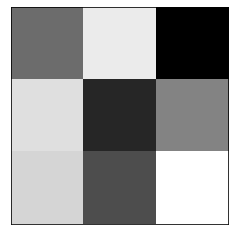

In [18]:
plt.imshow(kernel_i, cmap=plt.cm.gray) 
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
# ถ้าต้องการ Normalize ( 0 .. 1)
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)

In [20]:
kernel_idx = 0                ##  0 1 2 3 ...
kernel_i = kernels[:, :, 0 , kernel_idx]
print(kernel_i.round(2))

[[0.4  0.84 0.02]
 [0.8  0.16 0.48]
 [0.77 0.29 0.92]]


In [21]:
layername = model.layers[model_layer_idx].name
layername

'conv2D_2'

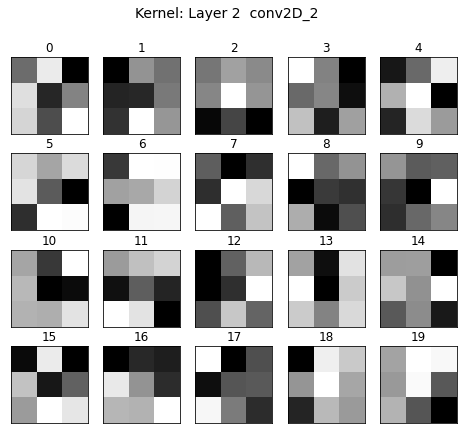

In [22]:
nplots = 20 
fig = plt.figure(figsize=(8, 6.8))

fig.suptitle(f'Kernel: Layer {model_layer_idx}  {layername}', fontsize=14)

for j in range(nplots):
    plt.subplot(4, 5, j+1)
    plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]); plt.yticks([])

plt.savefig(f'kernel {layername}.png', dpi=120)
plt.show()

# WS: Input image and Feature maps
- building1.jpg
- others

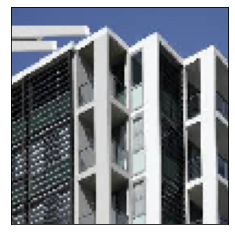

In [43]:
# Anaconda/miniconda (local computer)
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.models import Model
from matplotlib import pyplot

image = load_img('data/building1.jpg', target_size=(100, 100))

plt.imshow(image)
plt.xticks([]), plt.yticks([])

plt.show()

In [44]:
import os
filename = os.path.basename('data/building1.jpg')

print(filename)

building1.jpg


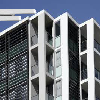

In [51]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
import matplotlib.pyplot as plt
import numpy as np

image = load_img('data/'+filename, target_size=(100, 100))
image

In [52]:
type(image)

PIL.Image.Image

In [53]:
img = img_to_array(image)
print(type(img))
print('shape=',img.shape)
print('max max pixel value=',np.min(img), np.max(img))

<class 'numpy.ndarray'>
shape= (100, 100, 3)
max max pixel value= 0.0 255.0


In [54]:
# Reshape ให้เป็น 4D Tensor
img = np.expand_dims(img, axis=0)
img.shape

(1, 100, 100, 3)

## Convo n

In [55]:
from tensorflow.keras.models import Model

model_layer_idx = 0           # model layer id 
md = Model(inputs=model.inputs, outputs=model.layers[model_layer_idx].output)

feature_maps = md.predict(img)
feature_maps.shape

1/1 [==============================] - 0s 167ms/step


(1, 98, 98, 32)

In [56]:
layername = model.layers[model_layer_idx].name
layername

'conv2D_1'

In [57]:
feature_maps.min(), feature_maps.max()

(0.0, 176.48323)

In [58]:
# Normalize (optional)
f_min, f_max = feature_maps.min(), feature_maps.max()
feature_maps = (feature_maps - f_min) / (f_max - f_min)
feature_maps.min(), feature_maps.max()

(0.0, 1.0)

## Kernel

(3, 3, 3, 32)
[[-0.12  0.02  0.05]
 [-0.11  0.09  0.03]
 [ 0.03  0.01  0.14]]


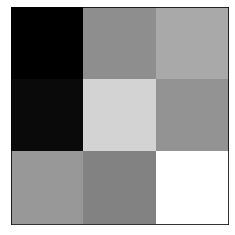

In [59]:
# Kernel for Convo Only!
kernels, biases = model.layers[model_layer_idx].get_weights()
print(kernels.shape)

kernel_idx = 0                ##  0 1 2 3 ...
kernel_i = kernels[:, :, 0 , kernel_idx]
print(kernel_i.round(2))

plt.imshow(kernel_i, cmap=plt.cm.gray) 
plt.xticks([])
plt.yticks([])
plt.show()

## Feature Maps

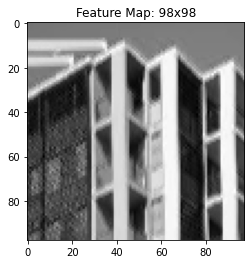

In [60]:
sample_idx = 0      # sample id
fea_idx = 4        # feature map id
feature_map_i = feature_maps[sample_idx, :, :, fea_idx]

# plt.title('Feature Map: {}x{}'.format(feature_map_i.shape[0],feature_map_i.shape[0]))
plt.title(f'Feature Map: {feature_map_i.shape[0]}x{feature_map_i.shape[0]}')
plt.imshow(feature_map_i, cmap=plt.cm.gray)
plt.show()

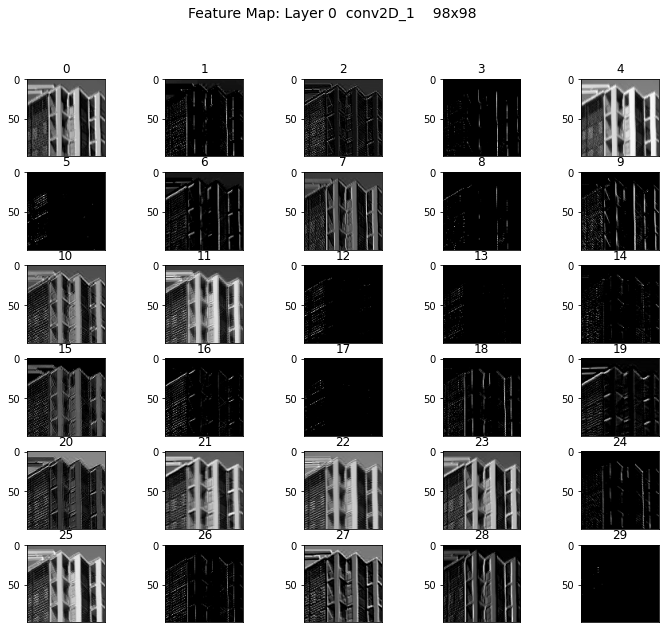

In [61]:
nplots = 30
fig = plt.figure(figsize=(12, 10)) 
fig.suptitle(f'Feature Map: Layer {model_layer_idx}  {layername} \
   {feature_map_i.shape[0]}x{feature_map_i.shape[0]}',
             fontsize=14)

for j in range(nplots):
    plt.subplot(6, 5, j+1)
    plt.imshow(feature_maps[sample_idx, :, :, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([]) # ; plt.yticks([])

plt.show()